# Practical Assignment I: Multilayer Perceptrons

Multilayer perceptron (MLP) is a fully connected, feedforward neural network architecture. It consists of one input layer, one or more hidden layers, and one output layer. Each layer consists of units (also called neurons, or nodes).

Each unit is connected to every unit in a neighboring layer, hence fully connected. This is why in Keras these layers are called `Dense`. Information flows from left to right, hence feedforward.

<img src="https://edirlei.com/images/nn1.png" width="800">

**Learning objectives:**

At the end of this DataLab, you will be able to build MLPs using Keras for the following problem types:

 - Regression
 - Binary classification
 - Multi-class classification
 - Multi-label classification
 
For each type, you will be given a suitable dataset. Then you will:

 - Pre-process the data if needed
 - Create a `Sequential()` model
 - Compile the model by defining a loss function, an optimizer and the metrics to be calculated
 - Train the model using the `fit()` method
 - Test the model using the `predict()` and `evaluate()` methods
 
 
 **Notebook contents:**
 
 1. Regression
 2. Binary classification
 3. Multi-class classification
 4. Multi-label classification

**Packages:**

Let's start by importing the basic packages required for this DataLab:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

## 1. Regression

The goal of a regression task is to predict a continuous outcome variable (dependent variable) based on one or more predictor variables (independent variables).

**The dataset**

In this task, you will use the diabetes dataset provided by `scikit-learn`.

Please read the dataset documentation before you start:

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Now let's load the data and display some samples from the dataset:

In [72]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
names = diabetes.feature_names
Xy_combined = np.concatenate((X, y[:, np.newaxis]), axis=1)
df = pd.DataFrame(Xy_combined,
                  columns=names + ['disease progression'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Let's split the dataset into a training set and a testing set using function ``train_test_split``:

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

Now we can visualize the dimensions of the sets:

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((296, 10), (146, 10), (296,), (146,))

**Task 1.1**
Build an MLP suitable for the diabetes dataset. Use a `Sequential()` model and `Dense` layers from Keras. You are free to pick any number of hidden layers and any number of units per layer as long as it works.  Use suitable activation functions.

In [75]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add 1 dense layers of 64 neurons
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add a dense layer 
model.add(Dense(1))

**Task 1.2**
Using `model.compile()`, compile the model. Select a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [76]:
# Compile your model
model.compile(optimizer = 'adam',
            loss ='mse',
            metrics =['mean_absolute_percentage_error'])

**Task 1.3** Using `model.fit()` Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [77]:
# Train your model
model.fit(X_train,y_train, epochs = 50, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/50


10/10 [==============================] - 0s 8ms/step - loss: 29107.4961 - mean_absolute_percentage_error: 99.9203 - val_loss: 28889.3145 - val_mean_absolute_percentage_error: 99.8305
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 29032.3105 - mean_absolute_percentage_error: 99.6938 - val_loss: 28779.5508 - val_mean_absolute_percentage_error: 99.5301
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 28883.6152 - mean_absolute_percentage_error: 99.2459 - val_loss: 28557.2285 - val_mean_absolute_percentage_error: 98.9211
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 28586.7598 - mean_absolute_percentage_error: 98.2891 - val_loss: 28095.9746 - val_mean_absolute_percentage_error: 97.6557
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 27963.1348 - mean_absolute_percentage_error: 96.4593 - val_loss: 27186.7598 - val_mean_absolute_percentage_error: 95.1481
Epoch 6/50
10/10 [=======================

**Task 1.4** Evaluate the model using `model.evaluate()`.

In [78]:
# Predict the output on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Print MSE
print('Mean Squared Error (MSE):', mse)

5/5 [==============================] - 0s 630us/step
Mean Squared Error (MSE): 3029.3579817973978


**Task 1.5** Get predictions on `X_test`. Plot `y_test` vs. predictions. On the same plot, plot a $x = y$ line. Think about what this line represents.

1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 531us/step


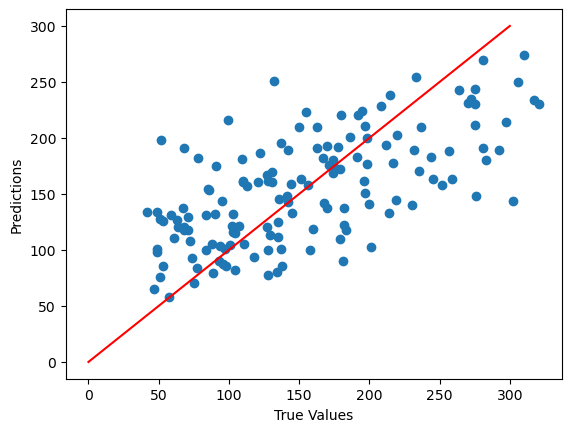

In [79]:
# Predict the output on the test set
predictions = model.predict(X_test)

# Plot predicted vs true values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Plot the x=y line
plt.plot([0, 300], [0,300], color='r')

plt.show()

## 2. Binary Classification

Binary classification is a type of classification where a model is trained to categorize data points into one of two categories. 

**The dataset**

In this task, you will use the breast cancer dataset provided by `scikit-learn`.

Please read the dataset documentation before you start:

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

Now let's load the data and display some samples from the dataset:

In [80]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
names = list(cancer.feature_names)
Xy_combined = np.concatenate((X, y[:, np.newaxis]), axis=1)
df = pd.DataFrame(Xy_combined,
                  columns=names + ['Benign'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Let's split the dataset into a training set and a testing set using function ``train_test_split``:

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

Now we can visualize the dimensions of the sets:

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

**Task 2.1**
Build an MLP suitable for the breast cancer dataset. Use a `Sequential()` model and `Dense` layers from Keras. You are free to pick any number of hidden layers and any number of units per layer as long as it works. Use suitable activation functions.

In [83]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(125, input_shape=(30,), activation='relu'))
model.add(Dense(64, activation='relu'))

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

**Task 2.2**
Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [84]:
# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Task 2.3**
Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [85]:
# Train your model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


12/12 [==============================] - 0s 638us/step - loss: 19.5778 - accuracy: 0.4803
Epoch 2/50
12/12 [==============================] - 0s 552us/step - loss: 2.8600 - accuracy: 0.6273
Epoch 3/50
12/12 [==============================] - 0s 542us/step - loss: 0.9401 - accuracy: 0.7927
Epoch 4/50
12/12 [==============================] - 0s 531us/step - loss: 0.4995 - accuracy: 0.8609
Epoch 5/50
12/12 [==============================] - 0s 493us/step - loss: 0.5922 - accuracy: 0.8661
Epoch 6/50
12/12 [==============================] - 0s 517us/step - loss: 0.4306 - accuracy: 0.8924
Epoch 7/50
12/12 [==============================] - 0s 536us/step - loss: 0.4219 - accuracy: 0.8845
Epoch 8/50
12/12 [==============================] - 0s 520us/step - loss: 0.3666 - accuracy: 0.8976
Epoch 9/50
12/12 [==============================] - 0s 521us/step - loss: 0.3268 - accuracy: 0.9029
Epoch 10/50
12/12 [==============================] - 0s 501us/step - loss: 0.2917 - accuracy: 0.9003
Epoch 11/

**Task 2.4**
Evaluate the model using `model.evaluate()`.

In [86]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

6/6 [==============================] - 0s 579us/step - loss: 0.1708 - accuracy: 0.9468
Accuracy: 0.9468085169792175


**Task 2.5**
Plot the confusion matrix for your trained model on the test set.

In [87]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

# Convert to binary
y_pred = (y_pred > 0.5)*1

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

6/6 [==============================] - 0s 475us/step
[[ 63   4]
 [  6 115]]


## 3. Multi-class Classification

Multi-class classification is a task where an instance or sample can be classified into more than two categories or classes.

**The dataset**

In this task, you will use the MNIST dataset provided by `keras`.

Please read the dataset documentation before you start:

https://keras.io/api/datasets/mnist/

Now let's load the dataset (notice that function ``mnist.load_data`` automatizally splits the data into a training set and a testing set):

In [88]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

To visualize how the samples look like, we can display a random sample from the dataset:

Label: 1


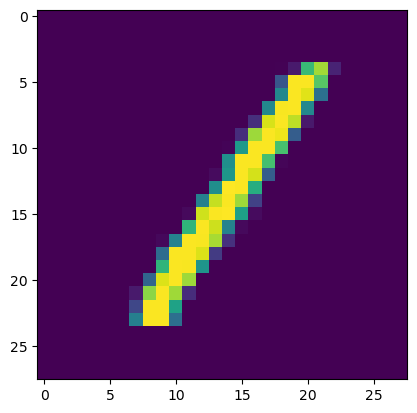

In [89]:
# View random digit
index = np.random.randint(0, 60000)
plt.imshow(X_train[index])
print('Label:', y_train[index])

We can also visualize the dimensions of the sets:

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

**Task 3.1**
The MLP architecture you will build is given below. 784 input units, two hidden layers with 30 units each, one output layer with 10 units. 

<img src="https://edirlei.com/images/nn2.png" width="500">

**Important**: Notice that X_train/X_test shape and the input layer shape of the network are not compatible (X_train shape is ``(, 28, 28)``, but the expected input layer shape is ``(, 784)``). Similarly, y_train/y_test and the output layer shape of the network, are not compatible (y_train shape is ``(,1)``, but the expected output layer shape is ``(,10)``). To solve this problem, you need to preprocess the data to make them compatible. Here are some hints on how to solve this problem:

- You can solve the incompatibility of the input by using the [reshape function](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
- You can solve the incompatibility of the output by using one-hot encoding through the [to_categorical function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).



In [91]:
# Reshape the input data to a 2D array of 28x28 pixels (784 pixels)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Reshape the output data to a 2D array of 10 pixels
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

**Task 3.2**
Build an MLP suitable for the MNIST dataset. Use a `Sequential()` model and `Dense` layers from Keras. Build the architecture shown in Task 3.1 Use suitable activation functions.

In [92]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(10, activation='softmax'))

**Task 3.3**
Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [93]:
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Task 3.4**
Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [94]:
# Train your model for 10 epochs
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


1875/1875 [==============================] - 2s 875us/step - loss: 1.0609 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.3052 - accuracy: 0.9237
Epoch 3/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.2050 - accuracy: 0.9472
Epoch 4/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.1611 - accuracy: 0.9568
Epoch 5/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.1337 - accuracy: 0.9638
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1065 - accuracy: 0.9703
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0983 - accuracy: 0.9723
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0898 - accuracy: 0.9754
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0775 - accuracy: 0.9789
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0680

**Task 3.5**
Evaluate the model using `model.evaluate()`.

In [95]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

313/313 [==============================] - 0s 751us/step - loss: 0.1225 - accuracy: 0.9718
Accuracy: 0.9718000292778015


**Challenge:**
Find the worst prediction. If you struggle with this task, try it later.

In [96]:
# YOUR CODE HERE #

## 4. Multi-label Classification

Multi-label classification is a type of classification where an instance (or data point) can be classified into multiple classes or categories simultaneously. This is different from multi-class classification, where each instance is assigned to only one class.

**The dataset**

In this task you will use a simulated dataset.

You are given 4 random integers ($x_1, x_2, x_3, x_4$) between -5 and 5 ($x_i \in [-5, 5]$). Your task is to develop an MLP that predicts parity and sign of the product of these four numbers ($x_1 \times x_2 \times x_3 \times x_4$).

**Definitions**

In mathematics, parity is the property of an integer of whether it is even or odd.

In mathematics, the sign of a real number is its property of being either positive, negative, or zero.

**Example**

$x_1=-1, x_2=1, x_3=-3, x_4=-5$

$ product = x_1 \times x_2 \times x_3 \times x_4 = -15$

parity of -15 is `odd` and sign of -15 is `negative`.

**Columns**

$x_i$: Integers between -5 (inclusive) and 5 (inclusive).

Parity column: $x_1 \times x_2 \times x_3 \times x_4$ is even (0) or odd (1).

Sign column: $x_1 \times x_2 \times x_3 \times x_4$ is negative (-1), or zero (0) or positive (1).

|$x_1$|$x_2$|$x_3$|$x_4$|$Parity$|$Sign$|
|:--|:--|:--|:--|:--|:--|
|-2|-4|-1|1|0|-1|
|-3|5|-3|3|1|1|
|-4|-2|5|3|0|1|
|-4|0|-5|0|0|0|
|1|1|2|-4|0|-1|
|-1|1|-3|-5|1|-1|


Based on these definitions, we can write a function to generate a simulated dataset:

In [97]:
def simulator(n):
    
    # x_i numbers with shape (n, 4)
    X = np.random.randint(-5, 6, size=(n, 4))

    # product of 4 numbers for each row
    # this will be used to calculate labels
    # but this won't be part of the dataset
    product = np.prod(X, axis=1)

    # label 1
    parity_col = product % 2
    parity_col = parity_col.reshape(-1, 1)

    # label 2
    pos = (product > 0)*1
    neg = (product < 0)*-1
    zero = (product == 0)*0
    sign_col = pos + neg + zero
    sign_col = sign_col.reshape(-1, 1)

    # concatenate columns to create the dataset
    dataset = np.concatenate((X, parity_col, sign_col), axis=1)
    
    return dataset

Now we can create the dataset:

In [98]:
dataset = simulator(n=10000)

To see how the data look like, we can display some samples from the dataset:

In [99]:
df = pd.DataFrame(dataset, columns=['x_1', 'x_2', 'x_3', 'x_4', 'Parity', 'Sign'])
df.head(10)

,x_1,x_2,x_3,x_4,Parity,Sign
0,-1,-5,3,3,1,1
1,-1,-2,-2,-4,0,1
2,-5,1,-3,-4,0,-1
3,0,5,3,-1,0,0
4,-5,-1,-3,1,1,-1
5,0,-3,5,-1,0,0
6,-4,-4,-1,-2,0,1
7,3,5,5,2,0,1
8,5,3,0,1,0,0
9,5,-1,-1,-2,0,-1


**Task 4.1**
Use the numpy array `dataset` to create `X` and `y`. Preprocess the data if needed.

In [100]:
X = dataset[:, 0:4]
y = dataset[:, 4:6]

X.shape, y.shape

((10000, 4), (10000, 2))

After preprocessing the data, we can split the dataset into a training set and a testing set using function ``train_test_split``:

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

Then we can visualize the dimensions of the sets:

In [102]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6700, 4), (6700, 2), (3300, 4), (3300, 2))

**Task 4.2**
Build a MLP suitable for this simulated dataset. Use a `Sequential()` model and `Dense` layers from Keras. Use suitable activation functions.

In [106]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

**Task 4.3**
Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Task 4.4**
Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [112]:
history = model.fit(X_train, y_train, batch_size=16, epochs = 8, validation_data=(X_test, y_test))

Epoch 1/8
  1/419 [..............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3750

419/419 [==============================] - 0s 574us/step - loss: -3.2002 - accuracy: 0.5248 - val_loss: -32.8527 - val_accuracy: 0.7191
Epoch 2/8
419/419 [==============================] - 0s 526us/step - loss: -3.9012 - accuracy: 0.5309 - val_loss: -2.3040 - val_accuracy: 0.5891
Epoch 3/8
419/419 [==============================] - 0s 525us/step - loss: -3.7515 - accuracy: 0.5263 - val_loss: 27.5382 - val_accuracy: 0.2809
Epoch 4/8
419/419 [==============================] - 0s 526us/step - loss: -4.7207 - accuracy: 0.5367 - val_loss: 38.8942 - val_accuracy: 0.2809
Epoch 5/8
419/419 [==============================] - 0s 528us/step - loss: -6.5511 - accuracy: 0.5399 - val_loss: -14.6973 - val_accuracy: 0.7191
Epoch 6/8
419/419 [==============================] - 0s 528us/step - loss: 0.1102 - accuracy: 0.5319 - val_loss: -22.3542 - val_accuracy: 0.7191
Epoch 7/8
419/419 [==============================] - 0s 531us/step - loss: -4.1069 - accuracy: 0.5300 - val_loss: -8.6966 - val_accuracy: 